# Problem 1:
Modify the square lattice given in pybinding notebook by adding a second B basis atom displaced at an arbitrary b = (b x , b y ) of your choice. Define the A → B hopping term to be t' = 2. Represent graphically the resulting lattice.

In [1]:
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt
pb.pltutils.use_style()

In [3]:
import pybinding as pb
d =0.2                # [nm] unit cell length
t1=2                  # [eV] hopping energy
t=1
a=0.1
bx=a 
by=a
# create a simple 2D lattice with vectors a1 and a2
lattice = pb.Lattice(a1=[d, 0], a2=[0, d])
lattice.add_sublattices(
    ('A',[0, 0]),             # add an atom called 'A' at position [0, 0]
    ('B',[bx,by]),

)

lattice.add_hoppings(
#(relative_index, from_sublattice, to_sublattice, energy)
     ([0, 0],'A','B',t1),
     ([0, 1],'A','A',t ),
     ([1, 0],'A','A',t ),
     ([1, 0],'B','A',t1),
     ([0, 1],'B','A',t1),
     ([1, 1],'B','A',t1),
    #([-1,1],'B','A',t1)
)

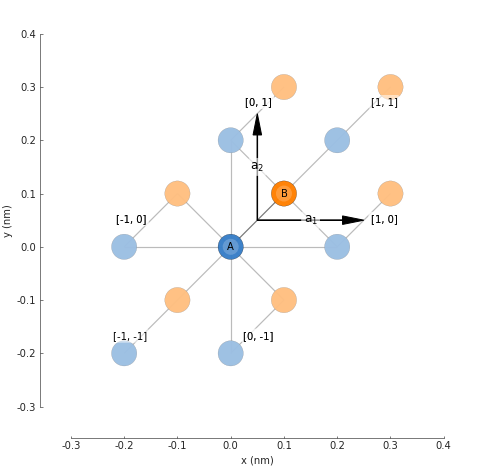

In [4]:
plt.figure(figsize=(8,8))
lattice.plot()           # plot the lattice that was just constructed
plt.show()               # standard matplotlib show() function

# Problem 2:
Write a short function to generate a square lattice with an arbitrary basis atom B whose relative position with respect to A can be defined at input. Plot the resulting lattices for two arbitrary choices of b.

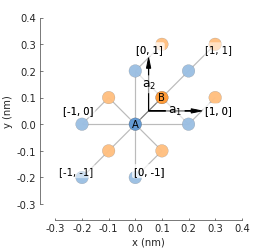

In [79]:
from math import sqrt

def square_lattice(bx,by):
    d =0.2  # [nm] unit cell length
    t1=2    # [eV] hopping energy
# create a simple 2D lattice with vectors a1 and a2
    lat= pb.Lattice(a1=[d, 0], a2=[0, d])
    lat.add_sublattices(
    ('A',[0, 0]),   # add an atom called 'A' at position [0, 0]
    ('B',[bx,by]),
    )
    
    lat.add_hoppings(
#(relative_index, from_sublattice, to_sublattice, energy)
    ([0, 0],'A','B',t1),
    ([0, 1],'A','A',t ),
    ([1, 0],'A','A',t ),
    ([1, 0],'B','A',t1),
    ([0, 1],'B','A',t1),
    ([1, 1],'B','A',t1),
    #([-1,1],'B','A',t1)
    )
    return lat
a=0.1
lattice = square_lattice(bx=a,by=a)
lattice.plot()
plt.show()

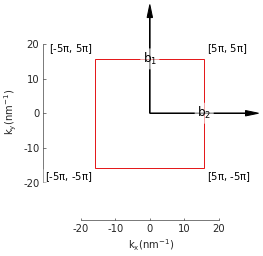

In [80]:
lattice.plot_brillouin_zone()

# Problem 3:
What are the definitions of a reciprocal lattice and a Brillouin zone? Write
down the formulas that relate the lattice vectors with the corresponding reciprocal lattice. Calculate the area of the Brillouin zone of the square lattice in Problem 1.

# Reciprocal Lattice:
The set of all wave vectors K that yield plane waves with the periodicity of a given Bravais lattice is known as its reciprocal lattice.

# Brillouin Zone:

The wigner sitz cell of the reciprocal space is called the Brillouin Zone.We can define it as the set of points in k space that can be reached from the origin without crossing any Bragg plane.The second Brillouin zone is the set of points that can be reached from the first zone by crossing only one Bragg plane.

Analytically, K belongs to the reciprocal lattice of a Bravais lattice of points R, provided that the relation 

$$e^{i\vec K.\vec {(R+r)}} =e^{i\vec K.\vec r}$$

Here the R is lattice periodicity.

$$e^{i\vec K.\vec R} =1$$

For all R in the Bravais lattice.

Let $$\vec a_1 ,\vec a_2,\vec a_3 $$  be a set of primitive vectors, then the reciprocal lattice can be generated by the three primitive vectors:

          
Here $$\vec b_1 ,\vec b_2 ,\vec b_3 $$ are reciprocal lattice vector:- 
 $$ \vec b_1= 2\pi \frac{(\vec a_2\times \vec a_3)}{(\vec a_1.\vec a_2\times \vec a_3)}$$
 $$ \vec b_2= 2\pi \frac{(\vec a_3 \times \vec a_1)}{(\vec a_1.\vec a_2\times \vec a_3)}$$
 $$ \vec b_3= 2\pi \frac{(\vec a_1\times \vec a_2)}{(\vec a_1.\vec a_2\times \vec a_3)}$$

# Brillouin Zone Area: $$4\pi^2$$
   
   

# Problem 4:
Modify the following example code provided in the python notebook such that it generates automatically the lattice vector of a rectangular lattice with lattice
vectors $a_1$ = (2, 0) and $a_2$ = (0, 1) with and without a basis atom B. Illustrate the resulting lattice and the associated Brillouin zone.

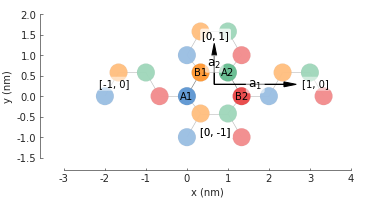

In [77]:
import pybinding as pb
import matplotlib.pyplot as plt
from math import sqrt

def monolayer_graphene():
    a=2/3             # [nm] unit cell length
   
    t=1               # [eV] nearest neighbour hopping

    lat=pb.Lattice(a1=[3*a, 0],
                   a2=[0,(3/2)*a])
    
    lat.add_sublattices(('A1',[0,0]),
                        ('B1',[0.5*a,a*(sqrt(3))/2]),
                        ('A2',[(3/2)*a,a*(sqrt(3))/2]),
                        ('B2',[2*a,0])
                       )
    lat.add_hoppings(
        # inside the main cell
         ([0, 0],'A1','B1',t),
         ([0, 0],'B1','A2',t),
         ([0, 0],'A2','B2',t),
        # between neighboring cell
         ([0,-1],'A1','B1' ,t),
         ([1, 0],'B2','A1' ,t),
         ([0,-1],'B2','A2' ,t)
    )
    return lat

lattice=monolayer_graphene()
lattice.plot()
plt.show()

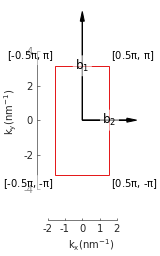

In [73]:
lattice.plot_brillouin_zone()